<a href="https://colab.research.google.com/github/YalamanchiLavanya/Android-Studio-Activity-life-Cycle-Project/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


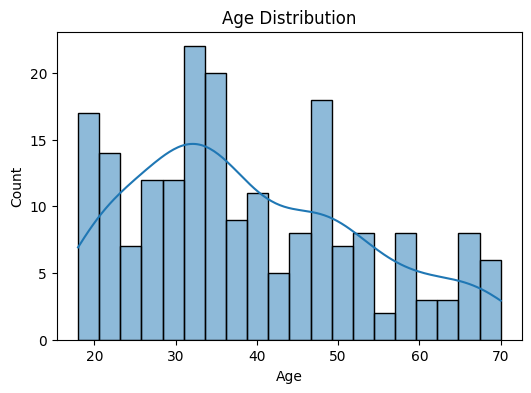

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


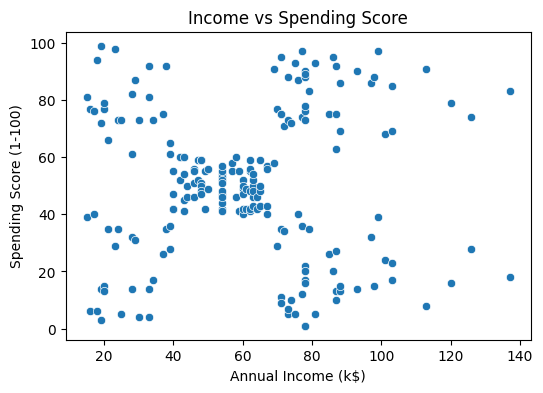

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)']
)
plt.title("Income vs Spending Score")
plt.show()


In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


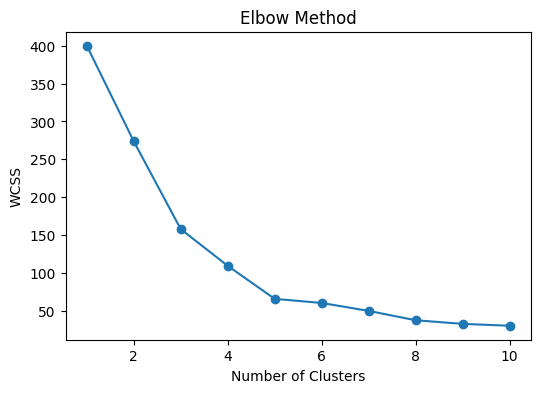

In [10]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters


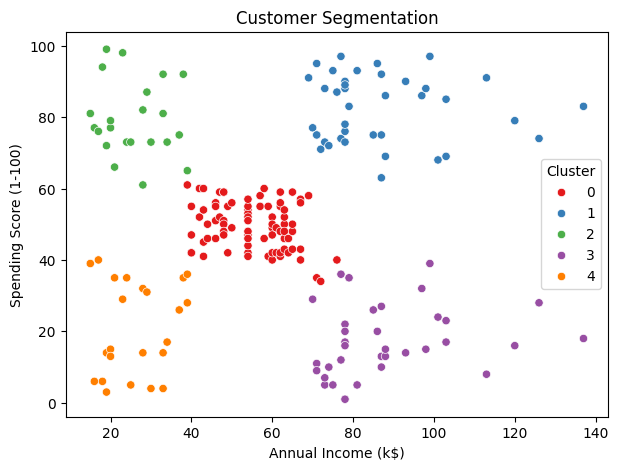

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set1'
)
plt.title("Customer Segmentation")
plt.show()


In [13]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.5546571631111091
